# Module 4: Anomaly Detection
## Cumulative Exercise:
### Outlier Detection for Linear Regression on an Auto MPG Dataset

In this exercise, you'll be attempting linear (Ridge) regression on a dataset encoding automotive 
MPG against several other discrete and continuous variables, 
as described [here](https://archive.ics.uci.edu/ml/datasets/auto+mpg) in the UCI repository.

### Notes
1. The clearest use of this dataset is to predict MPG, which is column one in the .txt.
2. For convenience, some `NaN` values have been pre-emptively cleaned from this dataset. Looking at the original dataset, there are a handful of entries containing null or `?` values, which we have removed.

In [64]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

# path to dataset
DATASET = '/dsa/data/all_datasets/autoMPG-1.txt'
assert os.path.exists(DATASET)   # check if datafile is present

# Set seed for reproducibility
np.random.seed(17)

# Read your data into a DataFrame called 'dataset'
dataset = pd.read_csv(DATASET, index_col=0).dropna().sample(frac=1).reset_index(drop = True)
dataset.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.000000,423.000000,423.000000
mean,22.151443,5.824960,196.756004,477.616796,8.785400e+05,15.538771,82.095406,1.569740
std,8.817102,2.720733,111.032114,1411.463705,3.249376e+06,2.729471,29.467660,0.799426
min,3.625937,-0.743522,-19.283003,46.000000,1.613000e+03,8.000000,-18.076791,1.000000
25%,16.000000,4.000000,102.500000,78.000000,2.259500e+03,13.700000,73.000000,1.000000
50%,21.500000,5.056846,151.000000,96.000000,2.930000e+03,15.500000,76.000000,1.000000
75%,28.050000,8.000000,302.000000,145.000000,3.860000e+03,17.000000,80.000000,2.000000
max,46.600000,31.872541,604.080466,10222.846370,1.879313e+07,24.800000,284.100062,3.000000


Pull columns from dataset into variables X (everything except mpg) and y (mpg).

In [2]:
# Complete code below this comment  (Question #001)
# ----------------------------------
X = dataset.loc[:,"cylinders":"origin"]
y = dataset.loc[:,"mpg"]

print("X, y shape:", X.shape, y.shape)


X, y shape: (423, 7) (423,)


Create training/validation split with 30% held out. 

In [24]:
# Complete code below this comment  (Question #E002)
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print("Training shapes (X, y): ", X_train.shape, y_train.shape)
print("Testing shapes (X, y): ", X_test.shape, y_test.shape)


Training shapes (X, y):  (296, 7) (296,)
Testing shapes (X, y):  (127, 7) (127,)


Fit a Ridge regressor without anomaly detection and report R^2 measure on the train set.

In [42]:
# Complete code below this comment  (Question #E003)
# ----------------------------------
naive_model = LinearRegression()
naive_model.fit(X_train, y_train)

train_score = naive_model.score(X_train, y_train)
train_cross_scores = cross_val_score(estimator = naive_model, X = X_train, y = y_train)

print("Scores: ", train_cross_scores)
print("Mean score (5 folds): ", np.mean(train_cross_scores))
print("R²:", train_score)


Scores:  [0.6736285  0.39419042 0.56759952 0.534704   0.51032364]
Mean score (5 folds):  0.5397263924092787
R²: 0.6175781091603217


Create prediction from X_test and store into variable <span style="background: yellow;">naive_predictions</span>. Report R^2 measure.

In [43]:
# Complete code below this comment  (Question #E004)
# ----------------------------------
naive_predictions = naive_model.predict(X_test)
print(X_test.shape, naive_predictions.shape)

pred_r_score = naive_model.score(X_train, y_train)
print("Prediction R²:", pred_r_score)


(127, 7) (127,)
Prediction R²: 0.6175781091603217


Create a scatter plot of y_test against naive predictions.  
The following is for reference.

~~~python
plt.scatter(<placeholder>, <placeholder>)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()
~~~

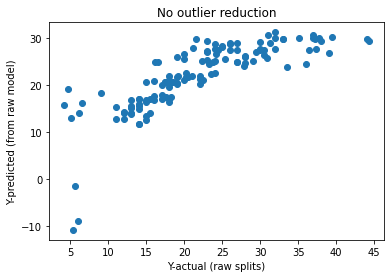

In [61]:
# Complete code below this comment  (Question #E005)
# ----------------------------------
plt.scatter(y_test, naive_predictions)
plt.title("No outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()



### Using a model of your choice, remove outliers from X and y.

Import your tools for outlier reduction.  
Options include: `KMeans`, `EllipticEnvelope`, `IsolationForest`, and `OneClassSVM`. 

In [46]:
# Complete code below this comment  (Question #E006)
# ----------------------------------
from sklearn.ensemble import IsolationForest


Create training/test set with the removal of outliers from the above training/test set. 

In [55]:
# Complete code below this comment  (Question #E007)
# ----------------------------------
# Construct IsolationForest 
iso_forest = IsolationForest(contamination = 0.05).fit(X, y)

# Get labels from classifier and cull outliers
train_iso_outliers = iso_forest.predict(X_train) == -1
test_iso_outliers = iso_forest.predict(X_test) == -1

X_train_iso = X_train[~train_iso_outliers]
y_train_iso = y_train[~train_iso_outliers]
X_test_iso = X_test[~test_iso_outliers]
y_test_iso = y_test[~test_iso_outliers]

print("Number of training outliers =", np.sum(train_iso_outliers))
print("Number of testing outliers =", np.sum(test_iso_outliers))


Number of training outliers = 16
Number of testing outliers = 6


Fit a new model against inliers and print score (R^2) for the model.

In [56]:
# Complete code below this comment  (Question #E008)
# ----------------------------------
iso_model = LinearRegression()
iso_model.fit(X_train_iso, y_train_iso)

# Cross validate the new model
iso_cross_scores = cross_val_score(estimator=iso_model, X = X_train_iso, y = y_train_iso)
iso_r_score = iso_model.score(X_train_iso, y_train_iso)

print(iso_cross_scores)
print("Mean CV score w/ IsolationForest:", np.mean(iso_cross_scores))
print("R²:", iso_r_score)

[0.47420152 0.77108394 0.78724312 0.5824706  0.36089856]
Mean CV score w/ IsolationForest: 0.5951795482739134
R²: 0.723179770415269


Predict with the test set, report R^2, and plot y-actual against y-predicted again for labels in testing set.

Mean absolute error w/ IsolationForest: 3.011391755655855


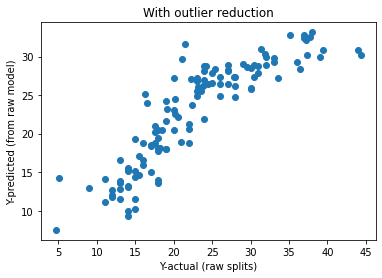

In [63]:
# Complete code below this comment  (Question #E009)
# ----------------------------------
iso_predictions = iso_model.predict(X_test_iso)
print("Mean absolute error w/ IsolationForest:", mean_absolute_error(y_test_iso, iso_predictions))

plt.scatter(y_test_iso, iso_predictions)
plt.title("With outlier reduction")
plt.xlabel("Y-actual (raw splits)")
plt.ylabel("Y-predicted (from raw model)")
plt.show()


Pickle (serialize) your model as the file named: `my_module_4_model.pkl`

In [65]:
# Complete code below this comment  (Question #E010)
# ----------------------------------
joblib.dump(iso_model, 'my_module_4_model.pkl')


['my_module_4_model.pkl']

# Save your notebook!